In [3]:
import innvestigate
import innvestigate.utils
import keras.applications.vgg16 as vgg16
import shap
import os
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import innvestigate.utils as iutils

In [4]:
# Get model
model, preprocess = vgg16.VGG16(), vgg16.preprocess_input

('n02138441', 'meerkat', 0.8831381)
('n02137549', 'mongoose', 0.11685845)
('n02361337', 'marmot', 1.32906e-06)
('n01518878', 'ostrich', 9.908773e-07)
('n02447366', 'badger', 4.4259448e-07)


array([142, 141, 140, 135,  83])

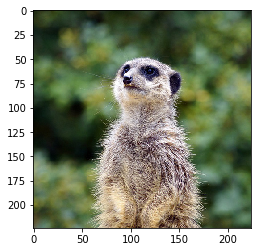

In [5]:
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]
plt.imshow(to_explain[1].astype("int64"))
preds = model.predict(to_explain)
for x in decode_predictions(preds)[1]:
    print(x)
model.predict(to_explain).argsort()[0, -5:][::-1] 

In [6]:
# Strip softmax layer
model = innvestigate.utils.model_wo_softmax(model)

# Creating an analyzer
analyzer = innvestigate.create_analyzer("deep_taylor", model)

In [7]:
# Applying the analyzer
x = preprocess(to_explain[1])

analysis = analyzer.analyze(x[None])

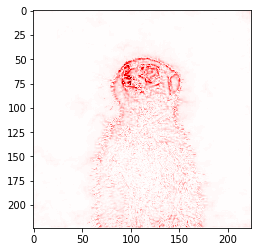

In [8]:
# Displaying the gradient
# Aggregate along color channels and normalize to [-1, 1]
analysis = analysis.sum(axis=np.argmax(np.asarray(analysis.shape) == 3))
analysis /= np.max(np.abs(analysis))
# Plot
plt.imshow(analysis[0], cmap="seismic", clim=(-1, 1))

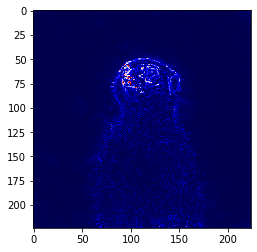

In [9]:
plt.imshow(analysis.squeeze(), cmap='seismic', interpolation='nearest')
plt.show()

In [64]:
# Creating an analyzer
patternnet_analyzer = innvestigate.create_analyzer("pattern.net", model, pattern_type="relu")

In [65]:
# Train (or adapt) the analyzer to the training data
patternnet_analyzer.fit(to_explain[1][None], verbose=True)

Epoch 1/1
1/1 [==============================] - 1493s 1493s/step - loss: 16.0000 - broadcast_65_loss: 1.0000 - broadcast_66_loss: 1.0000 - broadcast_67_loss: 1.0000 - broadcast_68_loss: 1.0000 - broadcast_69_loss: 1.0000 - broadcast_70_loss: 1.0000 - broadcast_71_loss: 1.0000 - broadcast_72_loss: 1.0000 - broadcast_73_loss: 1.0000 - broadcast_74_loss: 1.0000 - broadcast_75_loss: 1.0000 - broadcast_76_loss: 1.0000 - broadcast_77_loss: 1.0000 - broadcast_78_loss: 1.0000 - broadcast_79_loss: 1.0000 - broadcast_80_loss: 1.0000


In [66]:
analysis_new = patternnet_analyzer.analyze(to_explain[1])

ValueError: Error when checking input: expected input_3 to have 4 dimensions, but got array with shape (224, 224, 3)